***MARKETING CAMPAIGN ANALYSIS***

<span style="color: blue; background-color: yellow;">**Installing packages**</span>

In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Loading data sets**

In [ ]:
camp = pd.read_csv('./data/Marketing_Campaign/campaign.csv')
messages_df = pd.read_csv('./data/Marketing_Campaign/messages_demo.csv')

<span style="color: blue; background-color: yellow;">**Exploring Campaign dataset**</span>

In [4]:
camp.head()

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,NaN,False,NaN,146.0,False,False,True,False,False,False,NaN,NaN
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,NaN,False,NaN,97.0,False,False,True,False,False,False,NaN,NaN
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080.0,NaN,False,NaN,146.0,False,False,True,False,False,False,NaN,NaN
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838.0,NaN,False,NaN,97.0,False,False,True,False,False,False,NaN,NaN
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503.0,NaN,False,NaN,109.0,False,True,True,False,False,False,NaN,NaN


In [5]:
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1907 non-null   int64  
 1   campaign_type                 1907 non-null   object 
 2   channel                       1907 non-null   object 
 3   topic                         1877 non-null   object 
 4   started_at                    1824 non-null   object 
 5   finished_at                   1808 non-null   object 
 6   total_count                   1824 non-null   float64
 7   ab_test                       12 non-null     object 
 8   warmup_mode                   1830 non-null   object 
 9   hour_limit                    31 non-null     float64
 10  subject_length                1880 non-null   float64
 11  subject_with_personalization  1880 non-null   object 
 12  subject_with_deadline         1880 non-null   object 
 13  sub

In [6]:
camp.describe()

,id,total_count,hour_limit,subject_length,position
count,1907.000000,1.824000e+03,31.000000,1880.000000,24.000000
mean,6122.944415,3.741295e+05,64874.193548,94.340426,6.333333
std,3847.749021,8.198459e+05,184639.986582,28.482613,4.536487
min,26.000000,1.000000e+00,300.000000,4.000000,0.000000
25%,2933.500000,8.467500e+02,6500.000000,92.000000,2.750000
50%,6078.000000,2.006500e+03,10000.000000,96.000000,5.500000
75%,8964.500000,2.820332e+05,35500.000000,112.000000,10.000000
max,25007.000000,5.371769e+06,1000000.000000,185.000000,14.000000


In [7]:
camp.isnull().sum()

id                                 0
campaign_type                      0
channel                            0
topic                             30
started_at                        83
finished_at                       99
total_count                       83
ab_test                         1895
warmup_mode                       77
hour_limit                      1876
subject_length                    27
subject_with_personalization      27
subject_with_deadline             27
subject_with_emoji                27
subject_with_bonuses              27
subject_with_discount             27
subject_with_saleout              27
is_test                         1880
position                        1883
dtype: int64

In [8]:
camp['total_count']      = camp['total_count'].astype('Int64')
camp['subject_length']   = camp['subject_length'].astype('Int64')
camp['position']         = camp['position'].astype('Int64')
camp['hour_limit']       = camp['hour_limit'].astype('Int64')
camp['started_at']       = pd.to_datetime(camp['started_at'])
camp['finished_at']      = pd.to_datetime(camp['finished_at'])
camp['ab_test']          = camp['ab_test'].astype('bool')
camp['is_test']          = camp['is_test'].astype('bool')
camp['warmup_mode']      = camp['warmup_mode'].astype('bool')

camp.head()

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080,True,False,<NA>,146,False,False,True,False,False,False,True,<NA>
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838,True,False,<NA>,97,False,False,True,False,False,False,True,<NA>
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503,True,False,<NA>,109,False,True,True,False,False,False,True,<NA>


<span style="color: blue; background-color: yellow;">**To Find out marketing channels**</span>

**Here is a list of channels of the retailer**

In [9]:
camp['channel'].value_counts(dropna=False)

channel
mobile_push     1396
email            483
multichannel      27
sms                1
Name: count, dtype: int64

<span style="color: blue; background-color: yellow;">**To Find out campaign types**</span>

In [10]:
camp['campaign_type'].value_counts(dropna=False)

campaign_type
bulk             1830
transactional      50
trigger            27
Name: count, dtype: int64

<span style="color: blue; background-color: yellow;">**Lets explore the campaign topics**</span>

In [11]:
camp['topic'].value_counts(dropna=False)

topic
sale out                      779
happy birthday                332
offer after purchase          316
leave review                  287
event                          63
NaN                            30
welcome campaign               27
order ready for pickup         10
order shipped                  10
order created                  10
order reminder                  9
abandoned cart                  6
order pickup still pending      4
abandoned view                  3
added to wish list              2
subscribed                      2
abandoned category              2
order cancelled                 2
price drop                      2
abandoned search                2
profile updated                 1
bonuses expired                 1
double opt in                   1
welcome letter                  1
back in stock                   1
recent purchase                 1
user added to segment           1
removed from wish list          1
wish list status                1
Name: co

*As a result above, due to data anonymization requirements, we cannot be able to provide the real subject**

<span style="color: blue; background-color: yellow;">**Dates and other bulk characteristics**</span>

In [12]:
list(camp.columns)

['id',
 'campaign_type',
 'channel',
 'topic',
 'started_at',
 'finished_at',
 'total_count',
 'ab_test',
 'warmup_mode',
 'hour_limit',
 'subject_length',
 'subject_with_personalization',
 'subject_with_deadline',
 'subject_with_emoji',
 'subject_with_bonuses',
 'subject_with_discount',
 'subject_with_saleout',
 'is_test',
 'position']

Only bulk campaigns have specified start and finish dates. The start date indicates the local time when a campaign was initiated by a marketing specialist, while the finish date marks the completion time when the final message of the campaign was sent out.

Typically, the duration for sending out campaigns varies from 30 minutes to 4 hours, depending on their size. However, certain campaigns, known as warmup campaigns, may extend over several days or even weeks. 

Warmup campaigns are often employed when a retailer acquires a new recipient database and wishes to avoid being flagged by email providers due to a high rate of hard bounces or spam complaints (refer to Messages). In such cases, the campaign is set to warmup_mode = True, and an hour_limit value is specified, indicating the maximum number of messages that can be sent per hour. The typical hour limit is usually set to 500 or 1000. 


In [13]:
camp['hour_limit'] = camp['hour_limit'].astype('Int64')

camp[ camp['hour_limit'] > 0 ]\
    [ ['started_at', 'finished_at', 'total_count', 'warmup_mode', 'hour_limit'] ].head()

,started_at,finished_at,total_count,warmup_mode,hour_limit
58,2021-06-29 14:00:13.752337,2021-06-29 17:02:36,613004,True,200000
257,2021-11-24 07:03:20.136238,2021-11-24 14:31:56,5327892,True,1000000
278,2021-12-03 06:04:29.576983,2021-12-03 09:44:29,35981,True,10000
297,2021-12-13 06:41:39.498379,2021-12-13 10:57:06,28759,True,10000
692,2022-06-07 11:12:59.694535,2022-06-09 07:36:13,91225,True,4000


<span style="color: blue; background-color: yellow;">**Additional Info**</span>

- is_test: says it us test campaign to a limited audience

- position: a position of trigger campaigns (only). Because different events can trigger different trigger campaigns, it's important to prevent uncontrolled sending of trigger messages without limits (recipient will mark campaign as spam or unsubscribe from retailer). So there is an important sequence from most important triggers (less position is more important) to the less important (larger position number). If trigger with the smaller number can be sent, all other triggers are ignored. If can't, next trigger is checked. If all triggers are checked and not match trigger conditions, trigger message is not sent.

In [14]:
trigger_df = camp[camp['campaign_type']== 'trigger']
trigger_df = trigger_df[ ~trigger_df['is_test'] == True ]
trigger_df [['topic', 'position']].sort_values(by = 'position', ascending = True)


,topic,position
1830,abandoned cart,0
1838,subscribed,0
1845,subscribed,0
1843,double opt in,1
1846,abandoned view,2
1856,abandoned view,2
1852,abandoned category,3
1836,abandoned cart,4
1839,abandoned cart,4
1847,abandoned cart,4


<span style="color: blue; background-color: yellow;">**Exploring Message dataset**</span>

*Message dataset is a set of messages sent to recipients. A ingle row is an individual message sent to the single recipient, and which contains type, channel, recipient, and some other metrics*

In [15]:
messages_df.head()

,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [16]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   message_id             object 
 2   campaign_id            int64  
 3   message_type           object 
 4   client_id              int64  
 5   channel                object 
 6   category               float64
 7   platform               object 
 8   email_provider         object 
 9   stream                 object 
 10  date                   object 
 11  sent_at                object 
 12  is_opened              object 
 13  opened_first_time_at   object 
 14  opened_last_time_at    object 
 15  is_clicked             object 
 16  clicked_first_time_at  object 
 17  clicked_last_time_at   object 
 18  is_unsubscribed        object 
 19  unsubscribed_at        object 
 20  is_hard_bounced        object 
 21  hard_bounced_at        object 
 22  is_soft_bounced  

In [17]:
list(messages_df.columns)

['id',
 'message_id',
 'campaign_id',
 'message_type',
 'client_id',
 'channel',
 'category',
 'platform',
 'email_provider',
 'stream',
 'date',
 'sent_at',
 'is_opened',
 'opened_first_time_at',
 'opened_last_time_at',
 'is_clicked',
 'clicked_first_time_at',
 'clicked_last_time_at',
 'is_unsubscribed',
 'unsubscribed_at',
 'is_hard_bounced',
 'hard_bounced_at',
 'is_soft_bounced',
 'soft_bounced_at',
 'is_complained',
 'complained_at',
 'is_blocked',
 'blocked_at',
 'is_purchased',
 'purchased_at',
 'created_at',
 'updated_at']

**Columns description**

- campaign_id - identifier from campaigns dataframe.
- message_type - Message type (bulk, trigger, transactional).
- channel - Message channel. Keep in mind: there is no multichannel message type as it was in campaigns dataframe, becase campaign can be multichannel  (can send messages to different channels), but message belongs to a single channel.

-Recipient info:

- client_id - recipients ID in REES46 database (unique per user).
- email_provider - a domain part of email (for email messages) like gmail.com or hotmail.com. Can be NA: data removed for unique personal or corporate domains with small number of messages which could cause person identification.
- Device info

- platform - platform type where a message was opened (if it was opened). This is defined automatically according to user-agent or other service info.    For example smartphone, tablet, phablet.
- stream - string value of a device type (desktop, ios, android, etc) where a message was opened (if it was opened). This is defined by app developer on retailer side, when they integrate SDK.


**Behavior:**

- date - date in YYYY-MM-DD when a message was sent. It's part of sent_at datetime property, helps to group messages by days.
- sent_at - Datetime when a message was sent.
- is_opened - Boolean flag if a message was opened by a recipient.
- opened_first_time_at - First time when a message was opened.
- opened_last_time_at - Last time when a message was opened (can be equal to opened_first_time_at, if the message was opened only once).
- is_clicked - Boolean flag if a message was clicked by a recipient.
- clicked_first_time_at - First time when a message was clicked.
- clicked_last_time_at - Last time when a message was clicked (can be equal to clicked_first_time_at, if the message was clicked only once).
- is_unsubscribed - Boolean flag if a recipient clicked unsubscribe link in a message.
- unsubscribed_at - Datetime when a recipient clicked unsubscribe link in a message.
- is_hard_bounced - Datetime when a message was "hard bounced": permanent failure to deliver a message if recipient's address does not exist (email is - not exist or mobile push token is invalid).
- hard_bounced_at - Datetime when a message was hard bounced.
- is_soft_bounced - Datetime when a message was "soft bounced": temporary failure to deliver a message if recipient's address temporary can't receive - - emails (for example mailbox is full, but exists and possibly can receive messages in the future).
- soft_bounced_at - Datetime when a message was soft bounced.
- is_complained - Boolean flag if a recipient clicked SPAM button in email client.
- complained_at - Datetime when a recipient clicked SPAM button in email client.
- is_blocked - Boolean flag if a delivery attempt was temporarily blocked by email provider (postmaster says "you act like spammer, I won't deliver your email). It's not permanent ban.
- blocked_at - Datetime when a delivery attempt was temporarily blocked by email provider
- is_purchased - Boolean flag if a recipient clicked any link in a message, opened a website or mobile app and made a purchase
- purchased_at - Datetime when a recipient made a purchase after click on email or other message.


In [18]:
# Fix data types
messages_df['campaign_id'] = messages_df['campaign_id'].astype('Int64')
messages_df['client_id'] = messages_df['client_id'].astype('Int64')
messages_df['date']                  = pd.to_datetime(messages_df['date'])
messages_df['sent_at']               = pd.to_datetime(messages_df['sent_at'])
messages_df['opened_first_time_at']  = pd.to_datetime(messages_df['opened_first_time_at'])
messages_df['opened_last_time_at']   = pd.to_datetime(messages_df['opened_last_time_at'])
messages_df['clicked_first_time_at'] = pd.to_datetime(messages_df['clicked_first_time_at'])
messages_df['clicked_last_time_at']  = pd.to_datetime(messages_df['clicked_last_time_at'])
messages_df['unsubscribed_at']       = pd.to_datetime(messages_df['unsubscribed_at'])
messages_df['hard_bounced_at']       = pd.to_datetime(messages_df['hard_bounced_at'])
messages_df['soft_bounced_at']       = pd.to_datetime(messages_df['soft_bounced_at'])
messages_df['complained_at']         = pd.to_datetime(messages_df['complained_at'])
messages_df['blocked_at']            = pd.to_datetime(messages_df['blocked_at'])
messages_df['purchased_at']          = pd.to_datetime(messages_df['purchased_at'])

def convert_to_bool(value):
    if value == 't':
        return True
    else:
        return False

messages_df['is_opened']       = messages_df['is_opened'].apply(convert_to_bool)
messages_df['is_clicked']      = messages_df['is_clicked'].apply(convert_to_bool)
messages_df['is_unsubscribed'] = messages_df['is_unsubscribed'].apply(convert_to_bool)
messages_df['is_hard_bounced'] = messages_df['is_hard_bounced'].apply(convert_to_bool)
messages_df['is_soft_bounced'] = messages_df['is_soft_bounced'].apply(convert_to_bool)
messages_df['is_complained']   = messages_df['is_complained'].apply(convert_to_bool)
messages_df['is_blocked']      = messages_df['is_blocked'].apply(convert_to_bool)
messages_df['is_purchased']    = messages_df['is_purchased'].apply(convert_to_bool)


In [19]:
#Checking dataframe
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 32 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   message_id             object        
 2   campaign_id            Int64         
 3   message_type           object        
 4   client_id              Int64         
 5   channel                object        
 6   category               float64       
 7   platform               object        
 8   email_provider         object        
 9   stream                 object        
 10  date                   datetime64[ns]
 11  sent_at                datetime64[ns]
 12  is_opened              bool          
 13  opened_first_time_at   datetime64[ns]
 14  opened_last_time_at    datetime64[ns]
 15  is_clicked             bool          
 16  clicked_first_time_at  datetime64[ns]
 17  clicked_last_time_at   datetime64[ns]
 18  is_unsubscribed      

<span style="color: blue; background-color: yellow;">**Analysis on the Bulk Campaign**</span>

In [20]:
bulk_df = messages_df[messages_df['message_type'] == 'bulk']

In [21]:
bulk_df.head()

,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
13107,54611899,1515915625624123395-608bc38f281ae,64,bulk,1515915625624123395,mobile_push,NaN,NaN,NaN,desktop,...,False,NaT,False,NaT,False,NaT,False,NaT,2023-04-29 02:33:57.746309,2023-04-29 02:33:57.74715
13108,54616884,1515915625624529552-608bc39b67326,64,bulk,1515915625624529552,mobile_push,NaN,NaN,NaN,desktop,...,False,NaT,False,NaT,False,NaT,False,NaT,2023-04-29 02:34:05.66109,2023-04-29 02:34:05.661892
13110,54852325,1515915625572420814-608bbb835b1f1,64,bulk,1515915625572420814,mobile_push,NaN,NaN,NaN,desktop,...,False,NaT,False,NaT,False,NaT,False,NaT,2023-04-29 02:40:15.17397,2023-04-29 02:40:15.174785
13113,54998014,1515915625633534320-608bc6a4de53a,64,bulk,1515915625633534320,mobile_push,NaN,NaN,NaN,desktop,...,False,NaT,False,NaT,False,NaT,False,NaT,2023-04-29 02:44:16.005064,2023-04-29 02:44:16.005879
73654,53967902,1515915625468066127-608bb03e9e608,63,bulk,1515915625468066127,mobile_push,NaN,NaN,NaN,desktop,...,False,NaT,False,NaT,False,NaT,False,NaT,2023-04-29 02:17:12.013656,2023-04-29 02:17:12.014466


<span style="color: black; background-color: white;">**Marketing Channels of the Bulk campaign**</span>

In [22]:
def channel():
    a = bulk_df['channel'].value_counts()
    b = bulk_df['channel'].value_counts() / bulk_df['channel'].value_counts().sum() * 100
    
    # Concatenate the two Series into a DataFrame
    result_df = pd.concat([a, b], axis=1)
    result_df.columns = ['Count', 'Percentage']
    
    return result_df

# Call the function
result = channel()
print(result)

               Count  Percentage
channel                         
mobile_push  4228385   59.871828
email        2834010   40.128172


<span style="color: black; background-color: white;">**Let's look at the conversion rate of the bulk campaign**</span>

<span style="color: black; background-color: white;">**1. Conversion rate of email channels at purchase**</span>

In [23]:
# Only selecting emails 
bulk_email_df = bulk_df[bulk_df['channel'] == 'email']
bulk_email_df.count()

id                       2834010
message_id               2834010
campaign_id              2834010
message_type             2834010
client_id                2834010
channel                  2834010
category                       0
platform                  418885
email_provider           2834010
stream                   2834010
date                     2834010
sent_at                  2834010
is_opened                2834010
opened_first_time_at      489189
opened_last_time_at       489189
is_clicked               2834010
clicked_first_time_at      81042
clicked_last_time_at       81042
is_unsubscribed          2834010
unsubscribed_at             9622
is_hard_bounced          2834010
hard_bounced_at              225
is_soft_bounced          2834010
soft_bounced_at              951
is_complained            2834010
complained_at               2100
is_blocked               2834010
blocked_at                    44
is_purchased             2834010
purchased_at                2496
created_at

In [24]:
# Group by campaign and calculate sent and purchased count
email_campaigns = pd.pivot_table(bulk_email_df, index='campaign_id', values='is_purchased', aggfunc=['count', 'sum'] )
email_campaigns.columns = ['sent', 'purchased']
email_campaigns.head()

,sent,purchased
campaign_id,,
129,3,0
136,177363,38
143,283063,89
150,781357,1220
152,274633,178


In [25]:
# Calculate conversion (in %)
email_campaigns['conversion'] = (email_campaigns['purchased'] / email_campaigns['sent'] * 100)
email_campaigns.sort_values('conversion', ascending=False)

,sent,purchased,conversion
campaign_id,,,
361,59475,480,0.807062
289,60332,194,0.321554
196,6373,10,0.156912
150,781357,1220,0.156139
337,6582,7,0.106351
297,135106,102,0.075496
152,274633,178,0.064814
143,283063,89,0.031442
366,165878,38,0.022908


In [26]:
# Let's look at top 5 campaigns with the highest converstion rate
email_campaigns.sort_values('conversion', ascending=False).head(5)

,sent,purchased,conversion
campaign_id,,,
361,59475,480,0.807062
289,60332,194,0.321554
196,6373,10,0.156912
150,781357,1220,0.156139
337,6582,7,0.106351


<Axes: xlabel='campaign_id'>

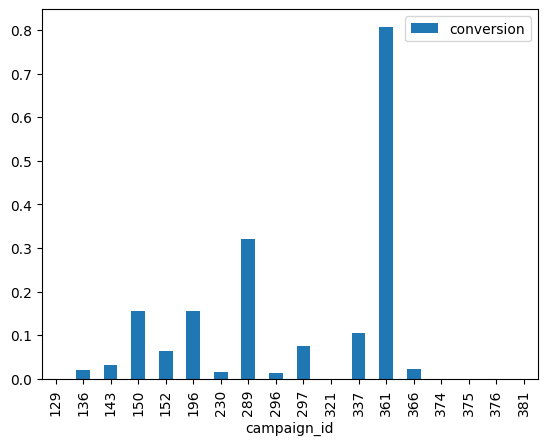

In [27]:
email_campaigns[['conversion']].plot(kind='bar')

In [46]:
# Median of the conversion rate

purchase_conversion_rate = email_campaigns['conversion'].median()
purchase_conversion_rate

0.022166694867058367

<span style="color: black; background-color: white;">**Let's discover more insights on the conversion rate**</span>

In [28]:
email_campaigns_data = camp.loc[ (camp['channel'] == 'email') & (camp['campaign_type'] == 'bulk')]
email_campaigns_data.drop(columns=['campaign_type', 'channel', 'total_count', 'ab_test', 
                                   'warmup_mode', 'hour_limit', 'position', 'is_test'], inplace=True, axis=1)

email_campaigns_data = email_campaigns_data.set_index(email_campaigns_data['id'])
email_campaigns_data.drop(labels=['id'], inplace=True, axis=1)

email_campaigns = email_campaigns.merge(email_campaigns_data, how='left', left_index=True, right_index=True)
email_campaigns.head()

,sent,purchased,conversion,topic,started_at,finished_at,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
campaign_id,,,,,,,,,,,,,
129,3,0,0.000000,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,133,False,False,True,False,False,False
136,177363,38,0.021425,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,133,False,False,True,False,False,False
143,283063,89,0.031442,sale out,2021-05-20 08:00:16.293566,2021-05-20 08:57:18,112,False,False,True,False,False,False
150,781357,1220,0.156139,sale out,2021-05-21 07:00:11.471804,2021-05-21 09:39:41,133,False,False,True,False,False,False
152,274633,178,0.064814,sale out,2021-05-24 07:48:42.153896,2021-05-24 08:43:38,109,False,False,True,False,False,False


<Axes: xlabel='topic'>

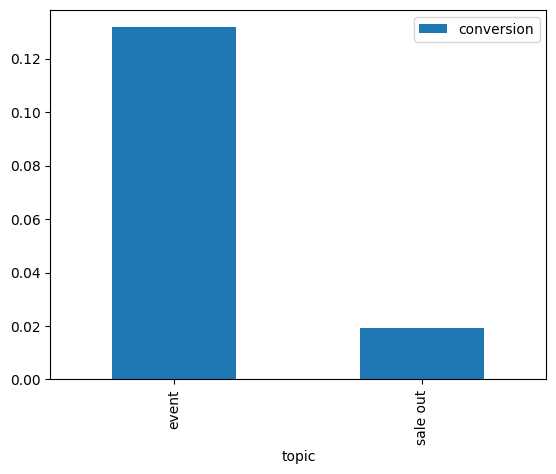

In [29]:
# Looking at the conversion rate by topics
email_campaigns[['topic', 'conversion']].pivot_table(index='topic', values='conversion', aggfunc = 'median').plot(kind='bar')

                                                                                                        

<Axes: xlabel='subject_with_personalization'>

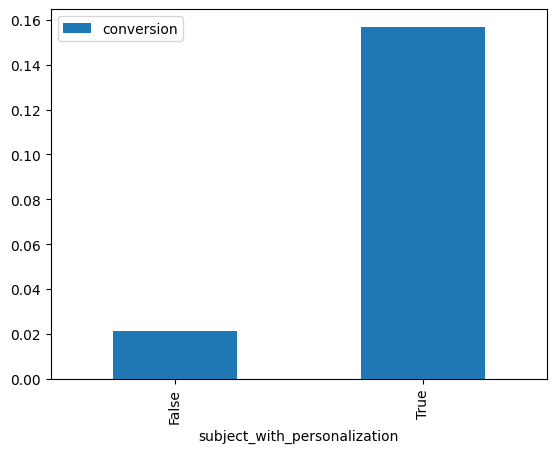

In [30]:
email_campaigns[['subject_with_personalization', 'conversion']].pivot_table(index='subject_with_personalization', 
                                                                             values = 'conversion', aggfunc = 'median').plot(kind='bar')

<span style="color: black; background-color: white;">**2. Conversion rate of email channels at Opening emails**</span>

In [40]:
# Group by campaign and calculate sent and purchased count
opening_email = pd.pivot_table(bulk_email_df, index='campaign_id', values='is_opened', aggfunc=['count', 'sum'] )
opening_email.columns = ['sent', 'opened']
opening_email

,sent,opened
campaign_id,,
129,3,3
136,177363,24041
143,283063,42161
150,781357,213141
152,274633,40818
196,6373,1879
230,651859,52776
289,60332,8017
296,231972,34420


In [41]:
# Calculate conversion (in %)
opening_email['conversion'] = (opening_email['opened'] / opening_email['sent'] * 100)
opening_email.sort_values('conversion', ascending=False)


,sent,opened,conversion
campaign_id,,,
129,3,3,100.000000
321,2,2,100.000000
376,2,2,100.000000
374,3,3,100.000000
381,3,2,66.666667
375,4,2,50.000000
196,6373,1879,29.483760
150,781357,213141,27.278312
337,6582,1691,25.691279


<Axes: xlabel='campaign_id'>

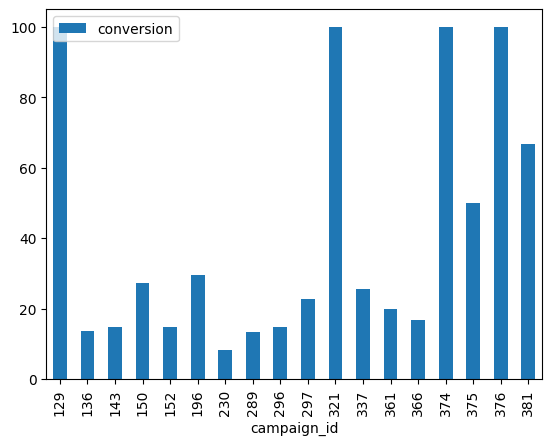

In [33]:
opening_email[['conversion']].plot(kind='bar')

In [48]:
# Median of the conversion rate

opening_email_conversion_rate = opening_email['conversion'].median()
opening_email_conversion_rate

24.17859300796458

In [34]:
opening_email = opening_email.merge(email_campaigns_data, how='left', left_index=True, right_index=True)
opening_email.head()

,sent,opened,conversion,topic,started_at,finished_at,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
campaign_id,,,,,,,,,,,,,
129,3,3,100.000000,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,133,False,False,True,False,False,False
136,177363,24041,13.554687,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,133,False,False,True,False,False,False
143,283063,42161,14.894564,sale out,2021-05-20 08:00:16.293566,2021-05-20 08:57:18,112,False,False,True,False,False,False
150,781357,213141,27.278312,sale out,2021-05-21 07:00:11.471804,2021-05-21 09:39:41,133,False,False,True,False,False,False
152,274633,40818,14.862744,sale out,2021-05-24 07:48:42.153896,2021-05-24 08:43:38,109,False,False,True,False,False,False


<Axes: xlabel='topic'>

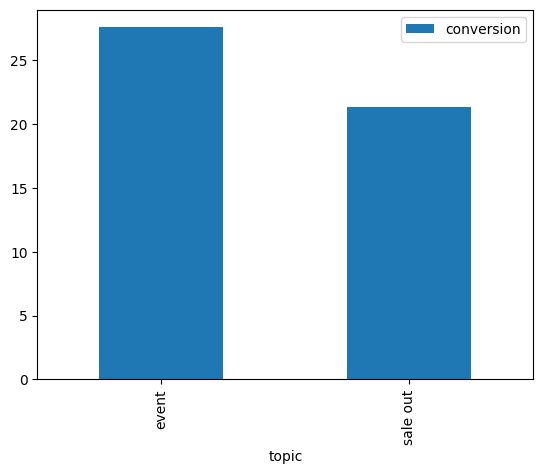

In [36]:
# Looking at the conversion rate by topics
opening_email[['topic', 'conversion']].pivot_table(index='topic', values='conversion', aggfunc = 'median').plot(kind='bar')


<Axes: xlabel='subject_with_personalization'>

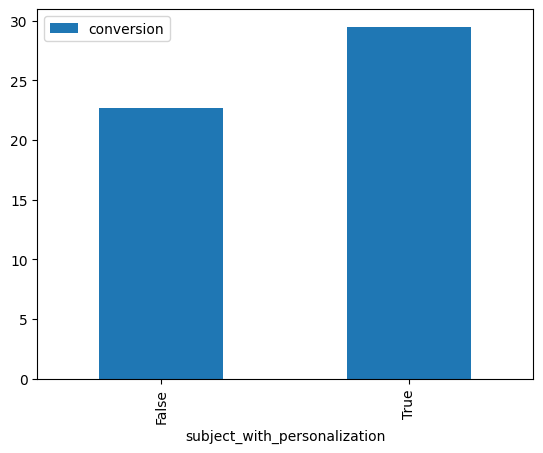

In [207]:
opening_email[['subject_with_personalization', 'conversion']].pivot_table(index='subject_with_personalization', 
                                                                             values = 'conversion', aggfunc = 'median').plot(kind='bar')

<span style="color: blue; background-color: yellow; font-size: 24px;">**Conclusion**</span>

- The median conversion rate for purchases stands at 0.022.- 
The median conversion rate for opening emails is approximately 24.1.

Notably, both conversion rates are higher when personalized subjects are used, along with topics related to "events."